In [1]:
import numpy as np

In [4]:
#Declare a scalar
x = np.array(12)
x

array(12)

In [5]:
x.ndim

0

In [6]:
x = np.array([12, 3, 6, 14])
print(x)
print(x.ndim)

[12  3  6 14]
1


In [7]:
m = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [22]:
m[1,1]

79

In [9]:
m.ndim

2

In [10]:
cube = np.array([[[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]],
                 [[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]],
                 [[5, 78, 2, 34, 0],
                  [6, 79, 3, 35, 1],
                  [7, 80, 4, 36, 2]]])
cube.ndim

3

In [12]:
print(cube.dtype)
print(m.dtype)
print(x.dtype)

int64
int64
int64


In [14]:
from keras.datasets import mnist
import matplotlib.pyplot as plt 
%matplotlib inline

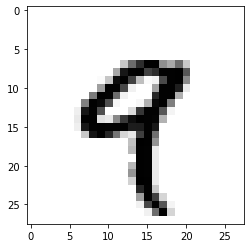

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
my_slice = train_images[10: 100]
print(my_slice.shape)

(90, 28, 28)


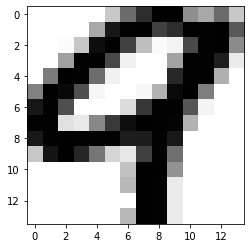

In [21]:
my_slice = train_images[:, 7:-7 , 7:-7] #crop the images to patches of 14 x 14
plt.imshow(my_slice[4], cmap=plt.cm.binary)
plt.show()

### Tensor operations

In [23]:
#Element-wise naive relu: np.maximum(z, 0.)
def naive_relu(x):
    assert len(x.shape) == 2, 'x must be a 2D Tensor'
    
    x = x.copy() #we are not modifying the original input
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    
    return x

In [24]:
x = np.array([[5, 78, 2, 34, 0],
              [6, -79, 3, -35, 1],
              [7, 80, -4, -36, 2]])
naive_relu(x)

array([[ 5, 78,  2, 34,  0],
       [ 6,  0,  3,  0,  1],
       [ 7, 80,  0,  0,  2]])

In [25]:
#Element-wise addition
def naive_add(x, y):
    assert len(x.shape) == 2, 'both inputs must be 2D tensor'
    assert x.shape == y.shape, 'both inputs must have equal size'
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = x[i, j] + y[i, j]
    
    return x

In [27]:
#Broadcasting
def naive_add_matrix_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] 
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = x[i,j] + y[j]
    
    return x

In [28]:
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))

z = np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [29]:
#Dot product
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
        
    return z

In [30]:
x = np.array([1,2,3,4,5])
y = np.array([5,6,7,8,9])
print(naive_vector_dot(x,y))

115


In [31]:
#element-wise product
x * y

array([ 5, 12, 21, 32, 45])

In [33]:
#dot product
x @ y

115

In [34]:
def naive_matrix_vector_dot(X,y):
    assert len(X.shape) == 2
    assert len(y.shape) == 1
    assert X.shape[1] == y.shape[0]
    
    z = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            z[i] += X[i, j] * y[j]
    
    return z

In [35]:
X = np.array([[1,2,3,4,5],
              [5,6,7,8,9],
              [10,11,12,13,14]])
y = np.array([1,2,3,4,5])
print(naive_matrix_vector_dot(X,y))

[ 55. 115. 190.]


### Tensor reshaping

In [36]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
print(x)
print(x.shape)

[[0. 1.]
 [2. 3.]
 [4. 5.]]
(3, 2)


In [37]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [38]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [39]:
#Tranpose a matrix
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)